# __Heart Failure 💔__

<span style='background:red'>
EDA and prediction
</span>

#### __Workflow Stages__

1. Problem definition.
2. Acquire training and testing data.
3. Wrangle, Prepare, Cleanse the data.
4. Analyze, identify patterns and explore the data.
5. Model, Predict and solve the problem.
6. Visualize, report, and present the problem solving steps and final solution.
7. Supply or submit the results.

The workflow indicates general sequence of how each stage may follow the other. However there are use cases with exceptions.

* We may combine multiple workflow stages. We may analyze by visualizing data.
* Perform a stage earlier than indicated. We may analyze data before and after wrangling.
* Perform a stage multiple times in our workflow. Visualize stage may be used multiple times.
* We may drop a stage altogether

# __Problem definition__

#### __Workflow goals__

The datascience solutions workflow solves for seven major goals.

__Classifing__. We may want to classify or categorize our samples. We may also want to undestand the implications or correlations of different classes with ourr solution goals

__Correlation__. One can approach the problem based on available features within the training dataset. Which features within the dataset contribute significantly to our solution goal? Statistically speaking is there a correlation among a feature and solution goal? As the feature values change does the solution state change as well, and visa-versa? This can be tested both for numerical and categorical features in the given dataset. We may also want to determine correlation among features other than survival for subsequent goals and workflow stages. Correlating certain features may help in creating, completing, or correcting features.

__Converting__. For modelling stage, one needs to prepare the data. Depending on the choice of model algorithm one may require all feature to be converted to numerical equivalent values. So for instance converting text categorical values to numerical values.

__Completing__. Data preparation may also require us to estimate any missing values within a feature. Model algorithm may work best when there are no missing values.

__Correcting__. We may also analyze the given training dataset for errors or possibly innacurate values within features and try to corrent these values or exclude the samples containing the errors. One way to do this is to detect any outliers among our samples or features. We may also completely discard a feature if it is not contributing to the analysis or may significantly skew the result.

__Creating__. Can we create new feature based on an existing feature or a set of features, such that the new feature follows the correlation, conversion, completeness goals.

__Charting__. How to slect the right visualization plots and charts depending on nature of the data and the solution goals.

In [220]:
# data analysis and wrangling
import imp
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

# model training
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


# __Acquire data__

In [221]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

# __Analize data__

### __Analyze by describing__

#### __Which feature are available?__

In [222]:
print(df.columns.values)

['age' 'anaemia' 'creatinine_phosphokinase' 'diabetes' 'ejection_fraction'
 'high_blood_pressure' 'platelets' 'serum_creatinine' 'serum_sodium' 'sex'
 'smoking' 'time' 'DEATH_EVENT']


#### __Which features are categorical__

* Anaemia
* Diabetes
* High blood pressure
* Sex
* Smoking
* Death event

#### __Which features are numerical?__

* Age
* Creatinine phosphokinase
* Ejection Fraction
* Platelets
* Serum Creatinine
* Serum sodium
* Time

#### __Which features contail null values?__

In [223]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

#### __What are the data types available in dataset?__

There are 10 int columns and 3 float column

In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


#### __What is the distibution of values?__

* There are 299 samples
* All patients are around 40-95 age
* Less than half of patients ware dead
* More than patients ware male


In [225]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [226]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


#### __Analyze by pivolating features__

In [227]:
df[['anaemia', 'DEATH_EVENT']].groupby(['anaemia'], as_index=False).mean().sort_values(by='DEATH_EVENT', ascending=False)

,anaemia,DEATH_EVENT
1,1,0.356589
0,0,0.294118


In [228]:
df[['diabetes', 'DEATH_EVENT']].groupby(['diabetes'], as_index=False).mean().sort_values(by='DEATH_EVENT', ascending=False)

,diabetes,DEATH_EVENT
0,0,0.321839
1,1,0.320000


In [229]:
df[['high_blood_pressure', 'DEATH_EVENT']].groupby(['high_blood_pressure'], as_index=False).mean().sort_values(by='DEATH_EVENT', ascending=False)

,high_blood_pressure,DEATH_EVENT
1,1,0.371429
0,0,0.293814


In [230]:
df[['sex', 'DEATH_EVENT']].groupby(['sex'], as_index=False).mean().sort_values(by='DEATH_EVENT', ascending=False)

,sex,DEATH_EVENT
0,0,0.323810
1,1,0.319588


In [231]:
df[['smoking', 'DEATH_EVENT']].groupby(['smoking'], as_index=False).mean().sort_values(by='DEATH_EVENT', ascending=False)

,smoking,DEATH_EVENT
0,0,0.325123
1,1,0.312500


#### __Analyze by visualization__

In [232]:
color_cycle= itertools.cycle(["orange","pink","blue","brown","red","grey","yellow","green"])

In [233]:
# for subplots
def subplts(r=1, c=1, fs=(20, 8)):
    return plt.subplots(r, c, figsize=fs)

# count plot
def plot_count(x, ax, d=df):
    sns.countplot(data=d, x=x, ax=ax)

# histogram without hue
def plot_hist(x, ax, d=df, kde=True, log=False):
    sns.histplot(data=d, x=x, ax=ax, kde=kde, log_scale=log)

# histogram with hue
def plot_hist_hue(x, hu, ax, d=df, multi="stack", kde=True, log=False):
    sns.histplot(data=d, x=x, ax=ax, hue=hu, kde=kde, multiple=multi, log_scale=log)
    
# boxplot single
def plot_box(x, ax, d=df):
    sns.boxplot(data=d, x=x, ax=ax)
    
# boxplot with one categorical
def plot_boxcat(x, y, ax, d=df):
    sns.boxplot(data=d, x=x, y=y, ax=ax)
    
# pie chart using pandas
def plot_pie(feat, ax, title):
    df[f"{feat}"].value_counts().plot.pie(ax=ax, autopct="%1.1f%%", shadow=True, explode=[0, 0.1]).set_title(f"{title}")

#### __age__

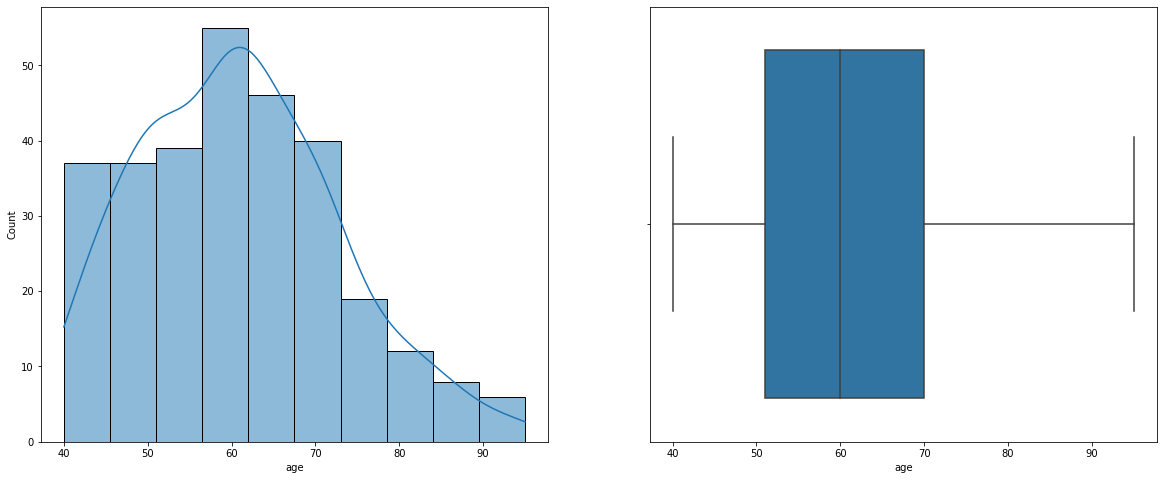

In [234]:
fig, ax = subplts(1, 2)
plot_hist("age", ax[0])
plot_box("age", ax[1])
plt.show()

#### __anaemia__

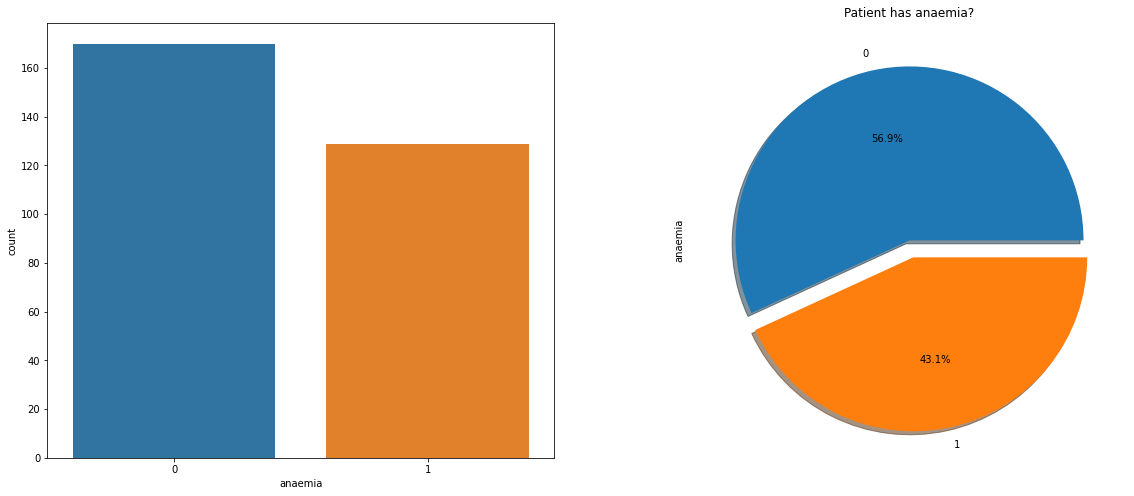

In [235]:
fig, ax = subplts(1, 2)
plot_count("anaemia", ax[0])
plot_pie("anaemia", ax[1], "Patient has anaemia?")
plt.show()

#### __creatinine_phosphokinase__

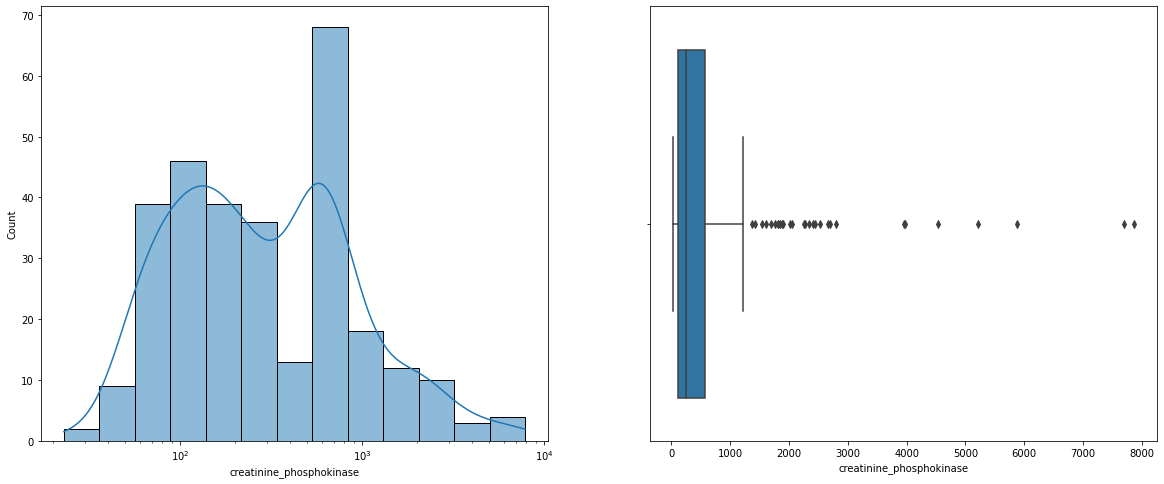

In [236]:
fig, ax = subplts(1, 2)
# log_scale set true to properly visualize
plot_hist("creatinine_phosphokinase", ax[0], log=True)
plot_box("creatinine_phosphokinase", ax[1])
plt.show()

#### __diabetes__

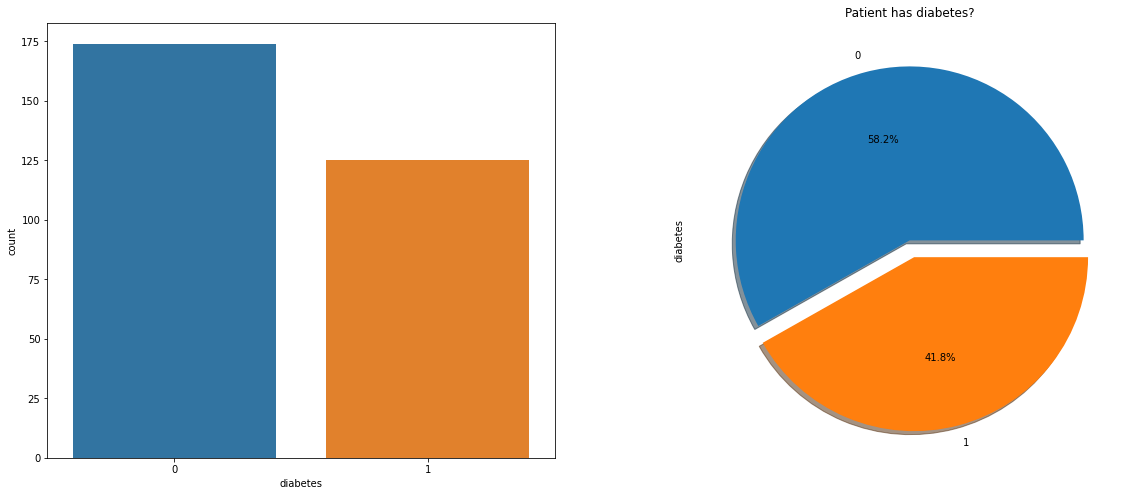

In [237]:
fig, ax = subplts(1, 2)

plot_count("diabetes", ax[0])
plot_pie("diabetes", ax[1], "Patient has diabetes?")

plt.show()

#### __ejection_fraction__

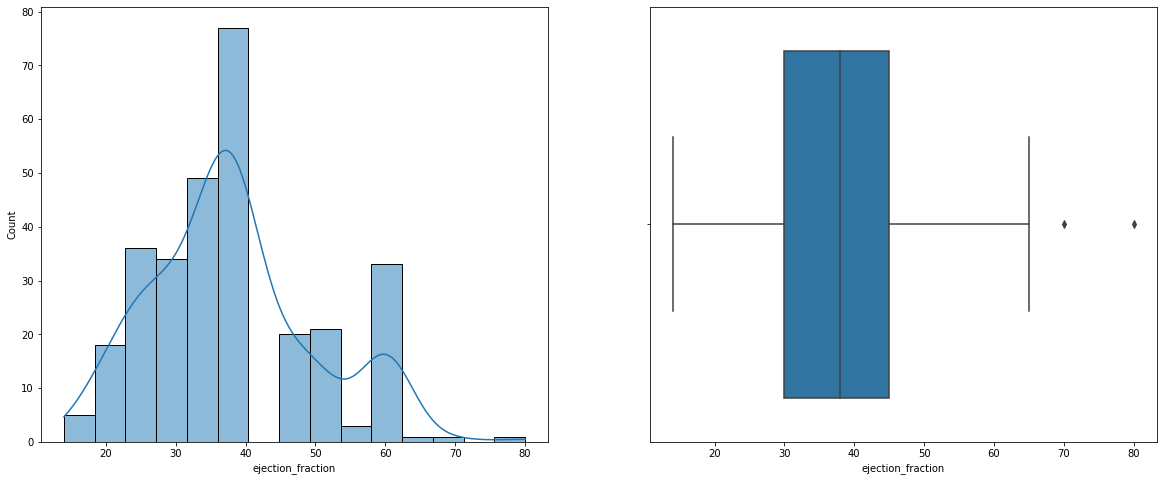

In [238]:
fig, ax = subplts(1, 2)

plot_hist("ejection_fraction", ax[0])
plot_box("ejection_fraction", ax[1])

plt.show()

#### __high_blood_pressure__

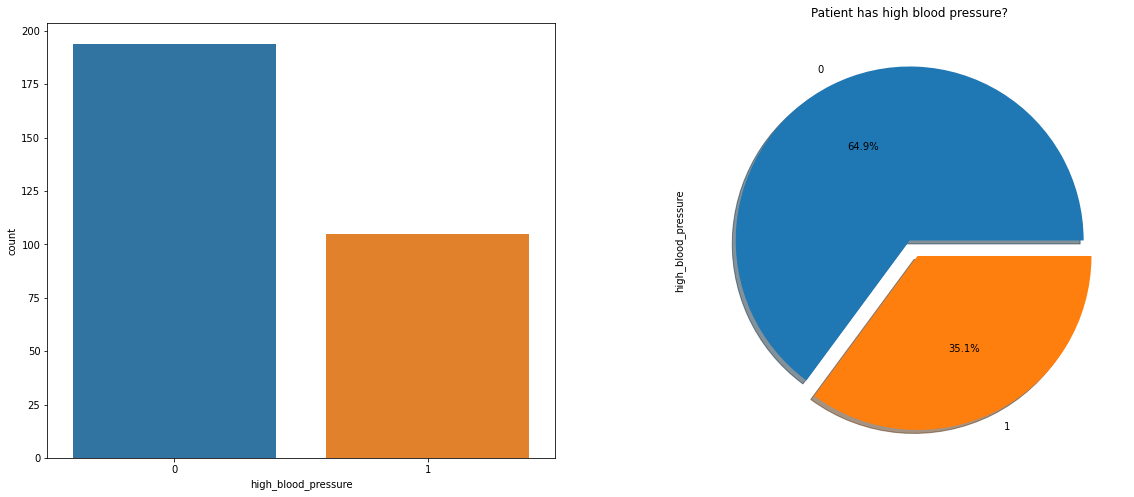

In [239]:
fig, ax = subplts(1, 2)

plot_count("high_blood_pressure", ax[0])
plot_pie("high_blood_pressure", ax[1], "Patient has high blood pressure?")

plt.show()

#### __platelets__

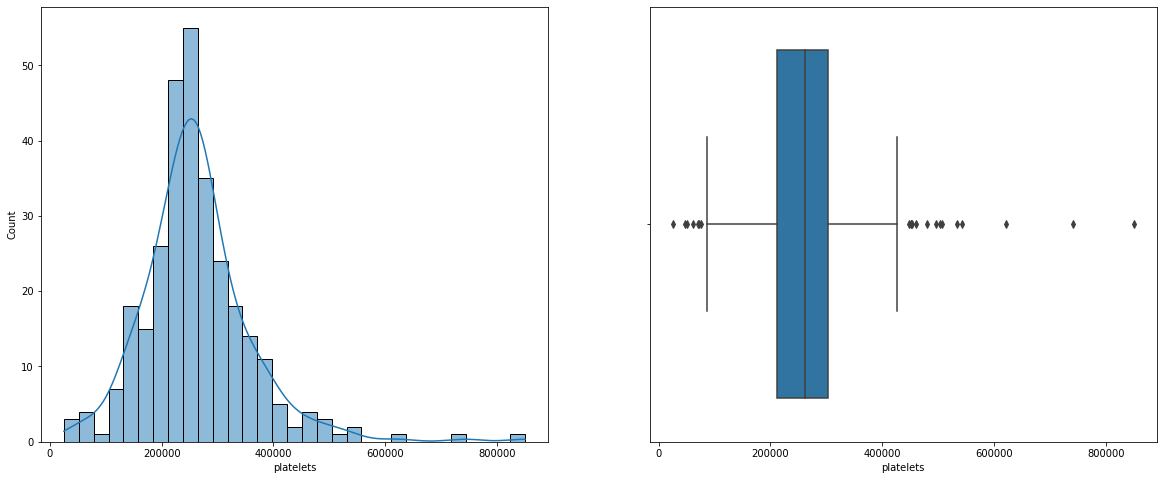

In [240]:
fig, ax = subplts(1, 2)

plot_hist("platelets", ax[0])
plot_box("platelets", ax[1])

plt.show()

#### __serum_creatinine__

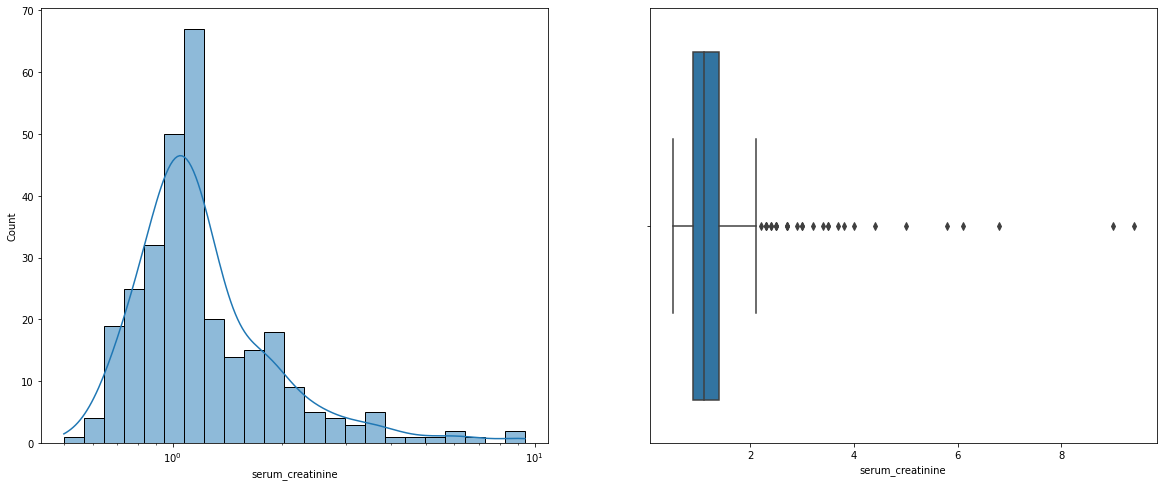

In [241]:
fig, ax = subplts(1, 2)

# log_scale set true to properly visualize
plot_hist("serum_creatinine", ax[0], log=True)
plot_box("serum_creatinine", ax[1])

plt.show()

#### __serum_sodium__

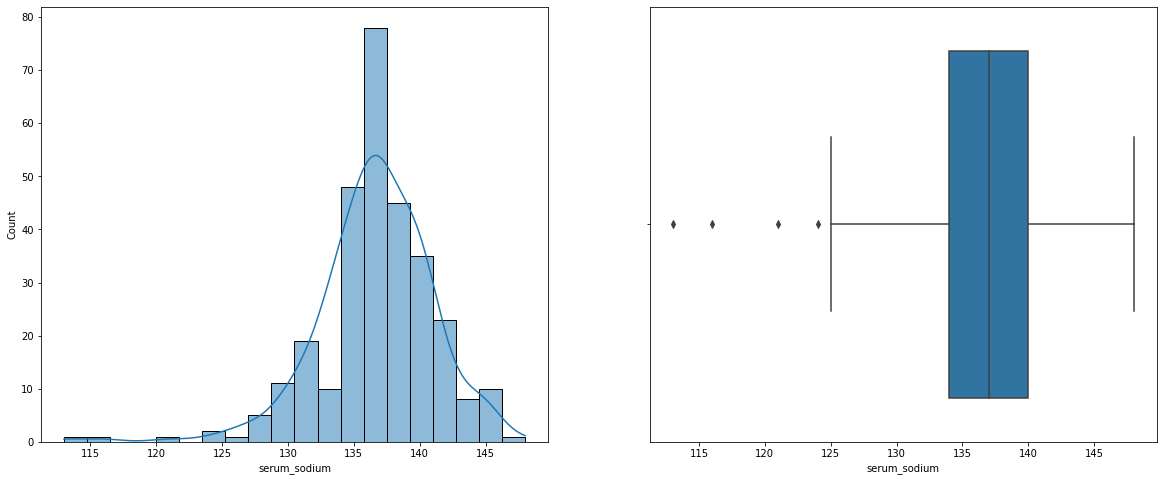

In [242]:
fig, ax = subplts(1, 2)

plot_hist("serum_sodium", ax[0])
plot_box("serum_sodium", ax[1])

plt.show()

#### __sex__

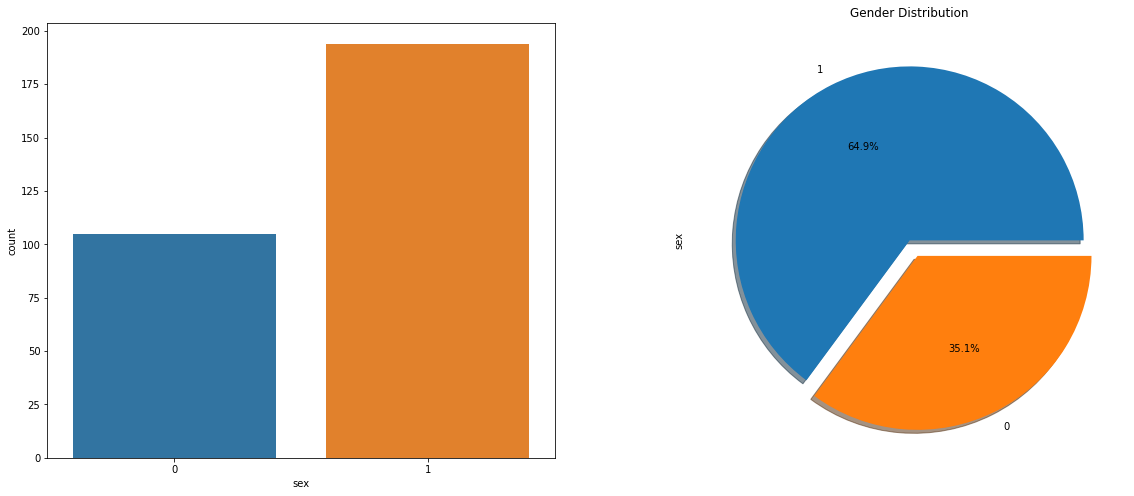

In [243]:
fig, ax = subplts(1, 2)

plot_count("sex", ax[0])
plot_pie("sex", ax[1], "Gender Distribution")

plt.show()

#### __smoking__

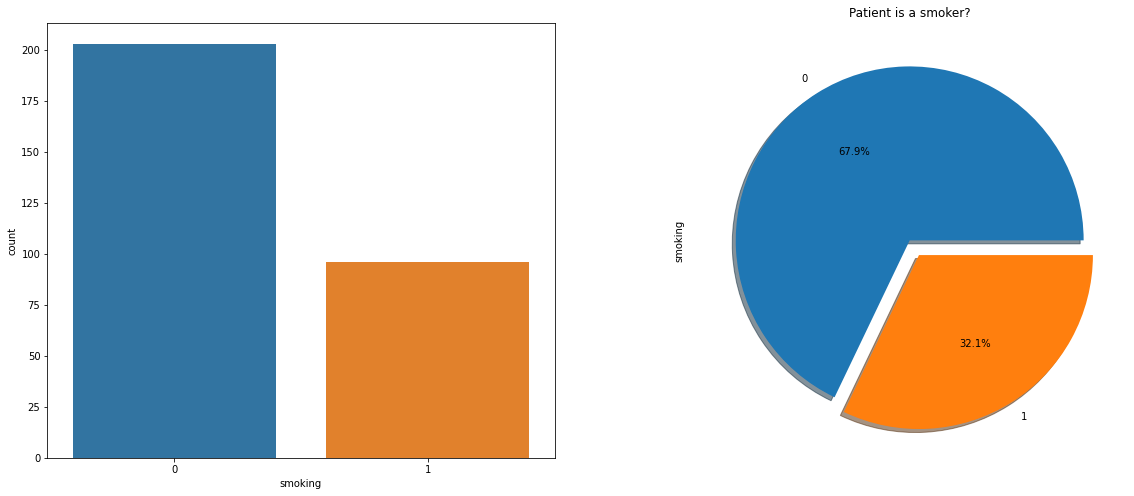

In [244]:
fig, ax = subplts(1, 2)

plot_count("smoking", ax[0])
plot_pie("smoking", ax[1], "Patient is a smoker?")

plt.show()

#### __time__

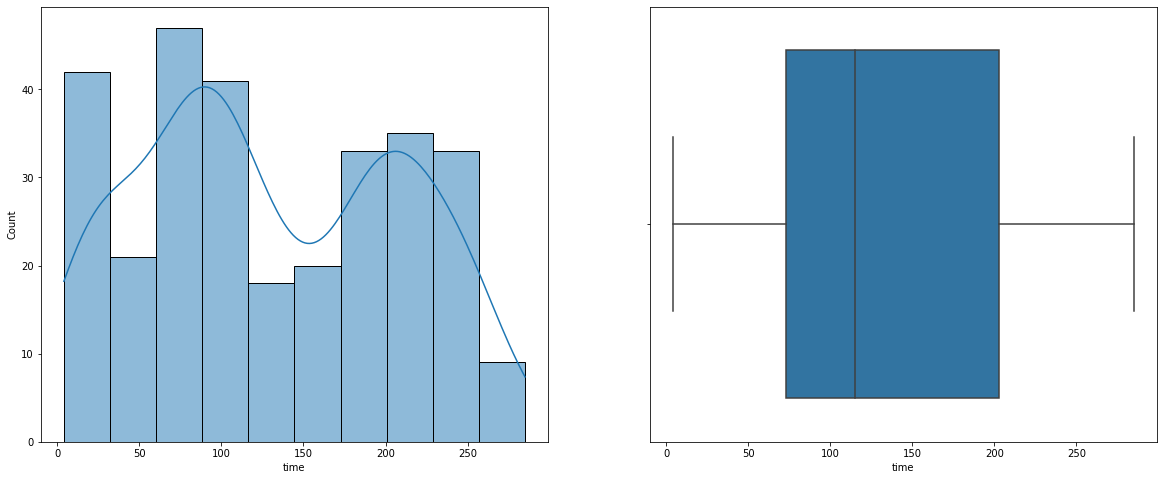

In [245]:
fig, ax = subplts(1, 2)

plot_hist("time", ax[0])
plot_box("time", ax[1])

plt.show()

#### __DEATH_EVENT__

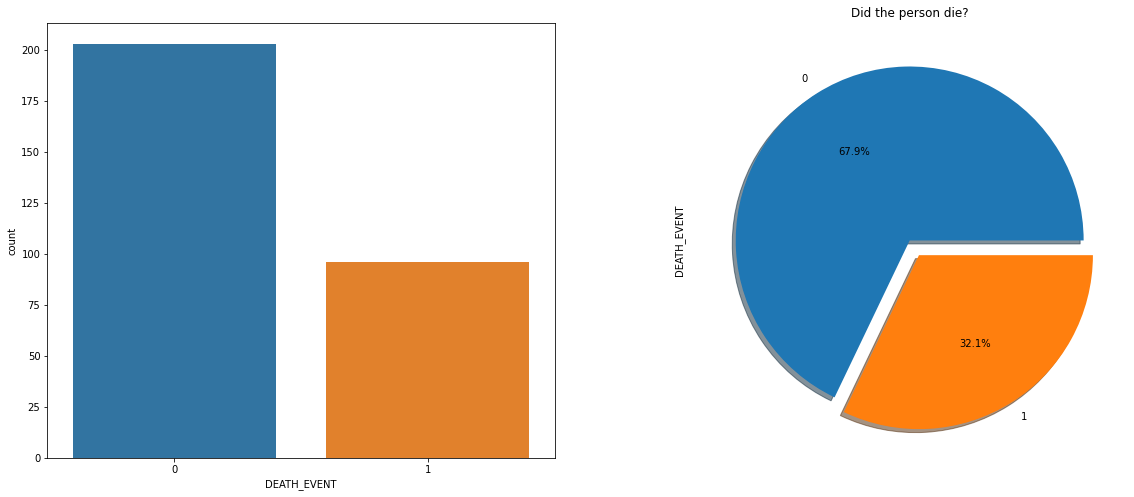

In [246]:
fig, ax = subplts(1, 2)

plot_count("DEATH_EVENT", ax[0])
plot_pie("DEATH_EVENT", ax[1], "Did the person die?")

plt.show()

#### __Analysis of Age and DEATH_EVENT__

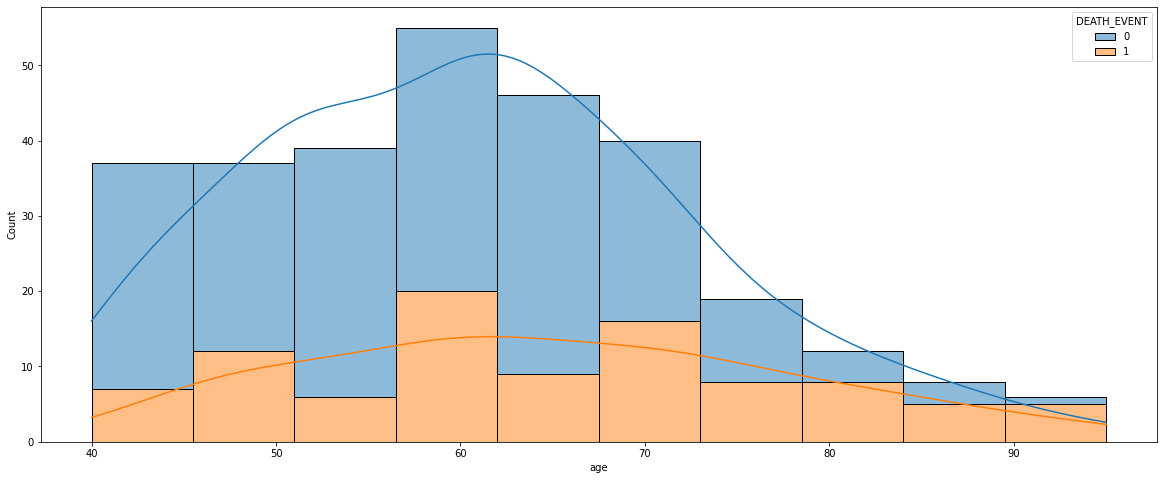

In [247]:
fig, ax = subplts()

plot_hist_hue("age", "DEATH_EVENT", ax)
plt.show()

#### __Analysis of Anaemia and DEATH_EVENT__

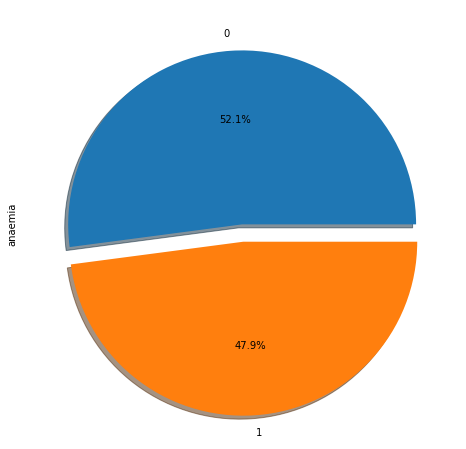

In [248]:
df1 = df[(df["anaemia"] == 0) & (df["DEATH_EVENT"] == 1)]
df2 = df[(df["anaemia"] == 1) & (df["DEATH_EVENT"] == 1)]

dfcomb = pd.concat([df1, df2])

# Plot
fig, ax = plt.subplots(figsize=(20, 8))

dfcomb["anaemia"].value_counts().plot.pie(autopct="%1.1f%%", ax=ax, shadow=True, explode=[0, 0.1])
plt.show()

#### __Analysis of creatinine_phosphokinase and DEATH_EVENT__

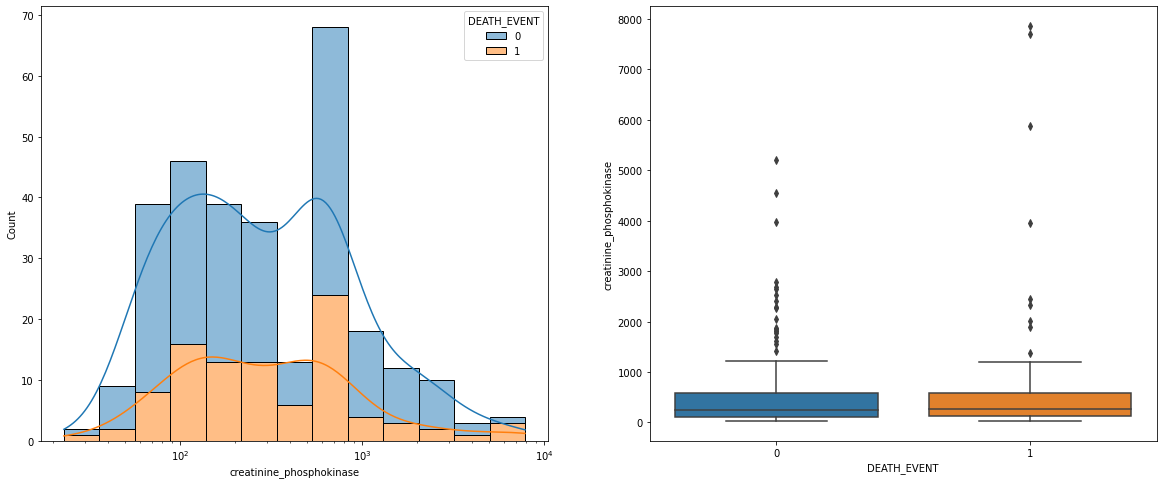

In [249]:
fig, ax = subplts(1, 2)

plot_hist_hue("creatinine_phosphokinase", "DEATH_EVENT", ax[0], log=True)
plot_boxcat("DEATH_EVENT", "creatinine_phosphokinase", ax[1])

plt.show()

#### __Analysis of diabetes, high_blood_pressure, sex and smoking vs DEATH_EVENT__

In [250]:
df1 = df[(df["diabetes"] == 0) & (df["DEATH_EVENT"] == 1)]
df2 = df[(df["diabetes"] == 1) & (df["DEATH_EVENT"] == 1)]
comb1 = pd.concat([df1, df2])

df3 = df[(df["high_blood_pressure"] == 0) & (df["DEATH_EVENT"] == 1)]
df4 = df[(df["high_blood_pressure"] == 1) & (df["DEATH_EVENT"] == 1)]
comb2 = pd.concat([df3, df4])

df5 = df[(df["sex"] == 0) & (df["DEATH_EVENT"] == 1)]
df6 = df[(df["sex"] == 1) & (df["DEATH_EVENT"] == 1)]
comb3 = pd.concat([df5, df6])

df7 = df[(df["smoking"] == 0) & (df["DEATH_EVENT"] == 1)]
df8 = df[(df["smoking"] == 1) & (df["DEATH_EVENT"] == 1)]
comb4 = pd.concat([df7, df8])

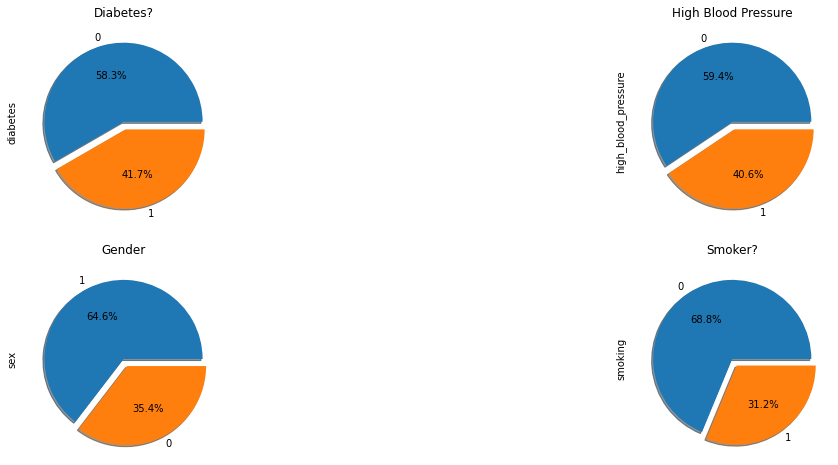

In [251]:
fig, ax = subplts(2, 2)

comb1["diabetes"].value_counts().plot.pie(ax=ax[0, 0], autopct="%1.1f%%", explode=[0, 0.1], shadow=True).set_title("Diabetes?")
comb2["high_blood_pressure"].value_counts().plot.pie(ax=ax[0, 1], autopct="%1.1f%%", explode=[0, 0.1], shadow=True).set_title("High Blood Pressure")
comb3["sex"].value_counts().plot.pie(ax=ax[1, 0], autopct="%1.1f%%", explode=[0, 0.1], shadow=True).set_title("Gender")
comb4["smoking"].value_counts().plot.pie(ax=ax[1, 1], autopct="%1.1f%%", explode=[0, 0.1], shadow=True).set_title("Smoker?")

plt.show()

#### __Analysis of ejection_fraction and DEATH_EVENT__

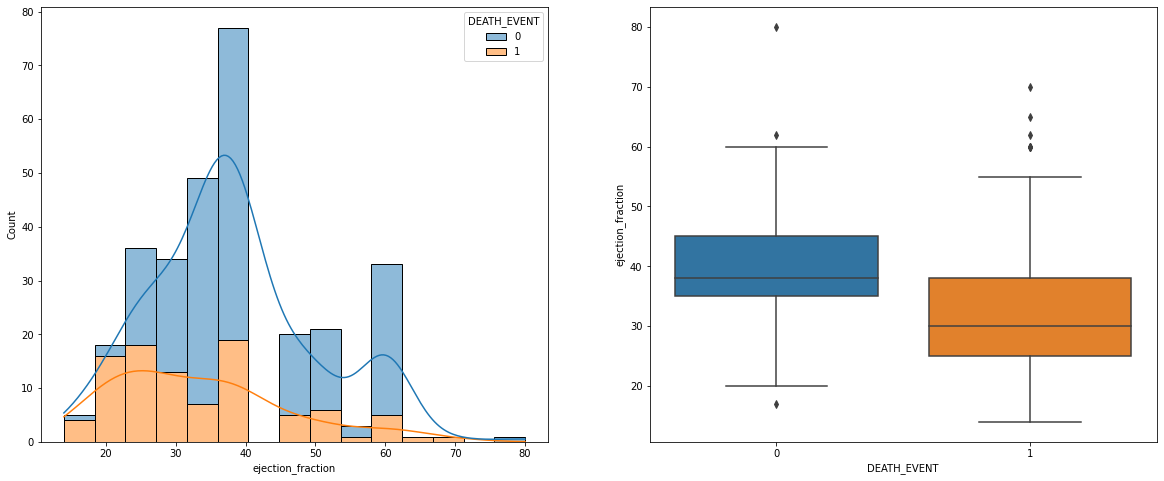

In [252]:
fig, ax = subplts(1, 2)

plot_hist_hue("ejection_fraction", "DEATH_EVENT", ax[0])
plot_boxcat("DEATH_EVENT", "ejection_fraction", ax[1])

plt.show()

#### __Analysis of serum_creatinine and DEATH_EVENT__

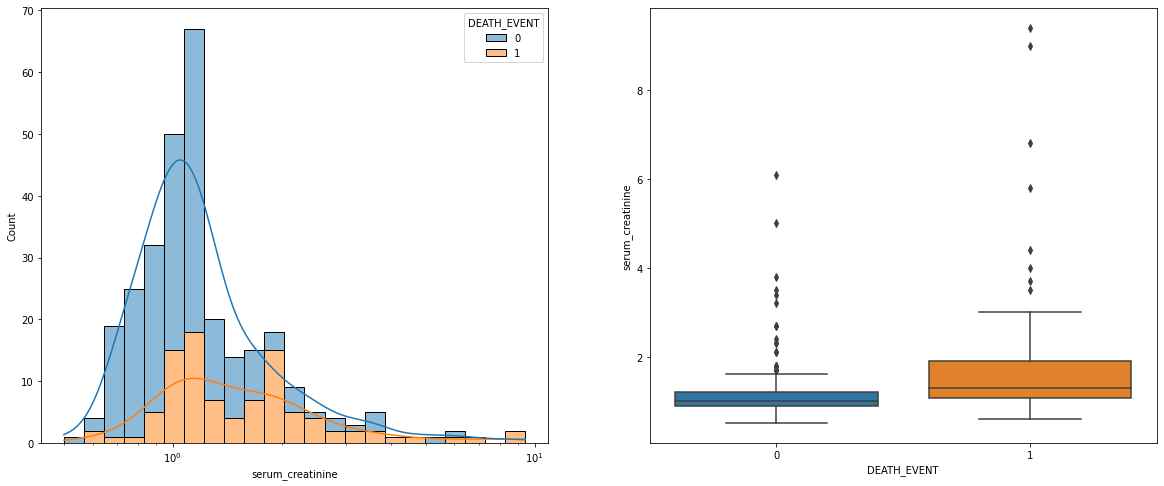

In [253]:
fig, ax = subplts(1, 2)

plot_hist_hue("serum_creatinine", "DEATH_EVENT", ax[0], log=True)
plot_boxcat("DEATH_EVENT", "serum_creatinine", ax[1])

plt.show()

#### __Analysis of serum_sodium and DEATH_EVENT__

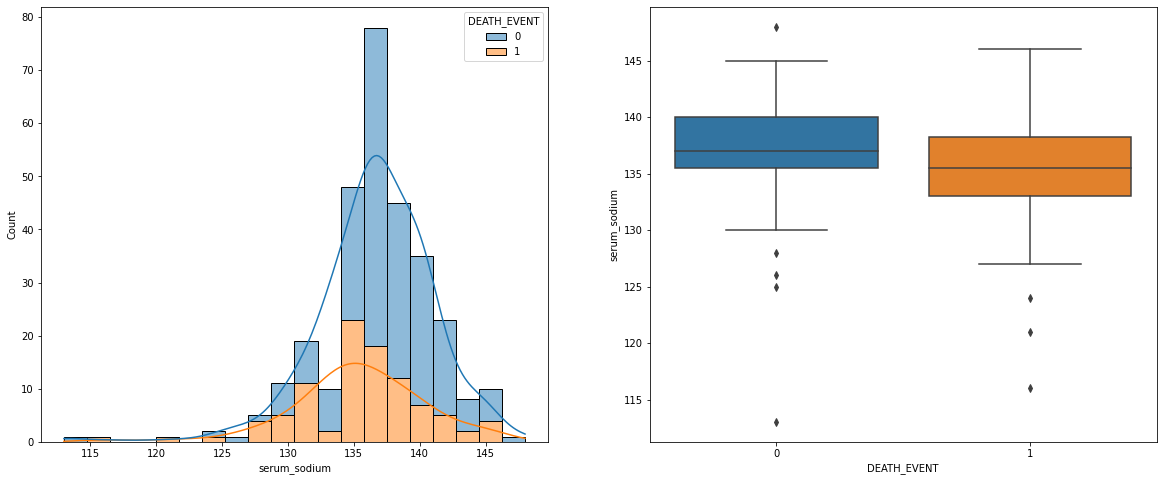

In [254]:
fig, ax = subplts(1, 2)

plot_hist_hue("serum_sodium", "DEATH_EVENT", ax[0])
plot_boxcat("DEATH_EVENT", "serum_sodium", ax[1])

plt.show()

#### __Analysis of time and DEATH_EVENT__

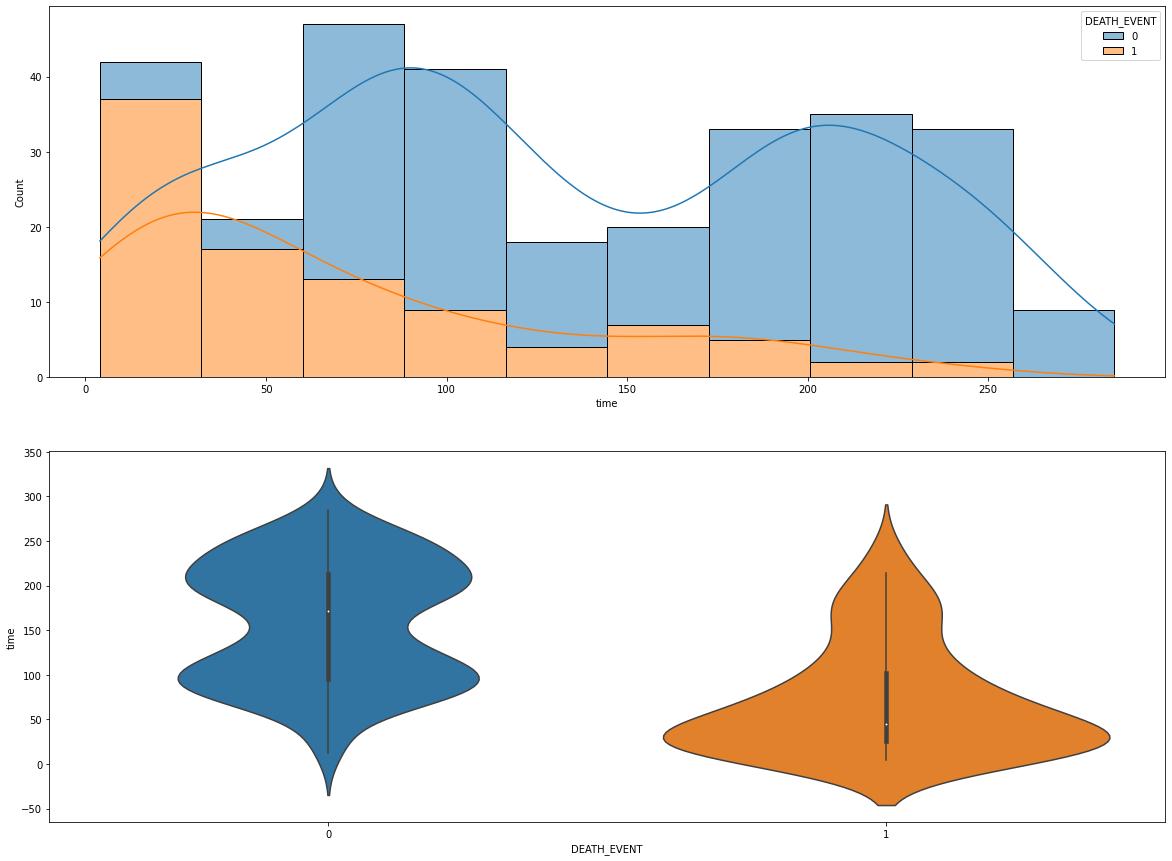

In [255]:
fig, ax = subplts(2, 1, fs=(20, 15))

plot_hist_hue("time", "DEATH_EVENT", ax[0])
sns.violinplot(data=df, x="DEATH_EVENT", y="time", ax=ax[1])

plt.show()

### __Analysing Correlations__

In [256]:
corr = df.corr()

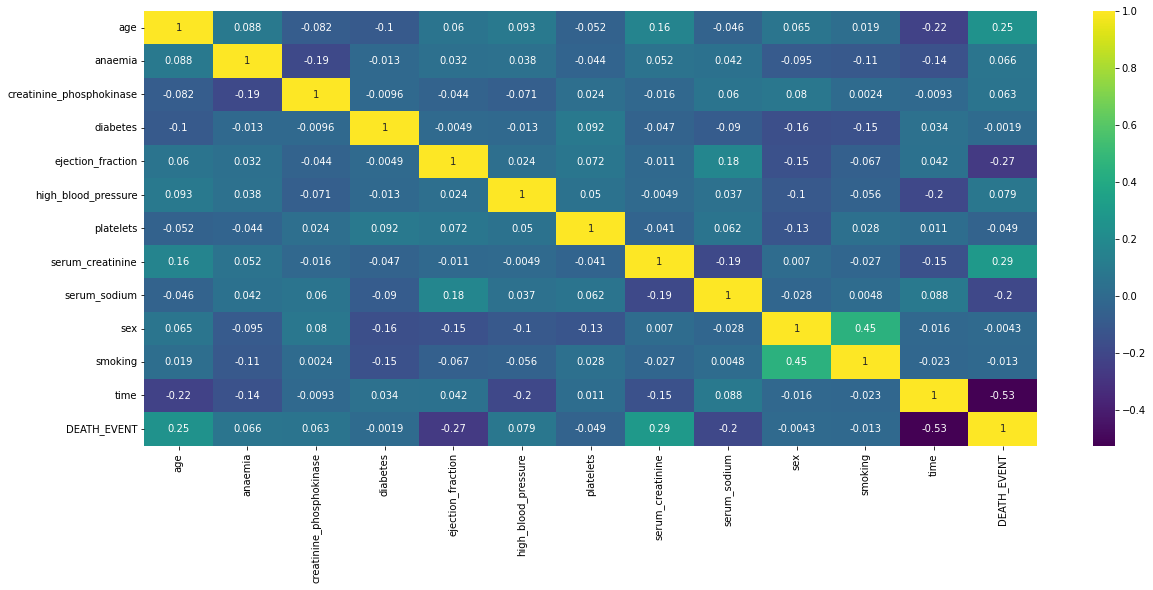

In [257]:
fig, ax = subplts()

dataplot = sns.heatmap(data=corr, annot=True, ax=ax, cmap="viridis")
plt.show()

# __Wrangle Data__

### __Scale the data__

In [258]:
scaler = MinMaxScaler()
scale_columns = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']

In [259]:
df_scaled = df.copy()
df_scaled[scale_columns] = scaler.fit_transform(df[scale_columns])

In [260]:
df_scaled.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,0.636364,0,0.071319,0,0.090909,1,0.290823,0.157303,0.485714,1,0,0.000000,1
1,0.272727,0,1.000000,0,0.363636,0,0.288833,0.067416,0.657143,1,0,0.007117,1
2,0.454545,0,0.015693,0,0.090909,0,0.165960,0.089888,0.457143,1,1,0.010676,1
3,0.181818,1,0.011227,0,0.090909,0,0.224148,0.157303,0.685714,1,0,0.010676,1
4,0.454545,1,0.017479,1,0.090909,0,0.365984,0.247191,0.085714,0,0,0.014235,1


### __Split the data__

In [261]:
X = df_scaled.drop(['DEATH_EVENT'], axis=1)
y = df_scaled['DEATH_EVENT']

In [262]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((239, 12), (60, 12), (239,), (60,))

# __Model train, predict and slove__

Now our dataset is looking good and we have to train the model. Then we can use the model to slove the problem solution. There are many model algorithms to use. But our problem is classification and reggression problem in supervised learning. So we can use these models.

* Logistic Reggression
* KNN
* Support vector mask
* Naive bayes classifier
* Decision tree
* Random forest
* Preception
* Artificial neural network
* RVM

In [263]:
#logistic regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

0.8833333333333333

In [264]:
#KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

c:\Users\Anjana Kavidu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.6166666666666667

In [265]:
#Support vector mask
svm = SVC()
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.85

In [266]:
# Naive bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb.score(X_test, y_test)

0.8

In [267]:
# Decision tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt.score(X_test, y_test)

0.8

In [268]:
# Random forest
rand_f = RandomForestClassifier()
rand_f.fit(X_train, y_train)
rand_f.score(X_test, y_test)

0.8833333333333333

In [269]:
# Perceptron
percep = Perceptron()
percep.fit(X_train, y_train)
percep.score(X_test, y_test)

0.8166666666666667